In [1]:
## Prashant Mahendran Feb 2022
#generate histograms of maximum temperature distributions for Siberia and PNW in Reanalysis and EC-Earth3


## Loops through days in ERA5 data for max daily temp in June/July 1995-2014
## Loops through EC Earth 13 ensemble run for 1995-2014
# Find spatial AVERAGE of max temp per day (using iris) within PNW and Siberian regions
#  Find Maximum average day across June July for Each Year
#  Plot histogram
#Repeat for climate model ensemble data 2015-2100 for SSP1-2.6 and SSP2-4.5
#Both Siberian and PNW regions


###INPUTS

# In[]: Specify the path out for all figures that will be saved i.e. the path to your directory on linux or the directory you wish to 
# save the figures
pathout ="/nfs/see-fs-01_teaching/ee21pnm/Project/output/max temp output"

# In[]: Specify the year, month, hours and days for which you wish to plot data for
#25 june to 7 July

year = "2021"
month= "06"

#specify list of days
#days = [1,2,3,4,5,6,7,8]
#days = [24,25,26,27,28,29,30]
#day = 28


# if you want to output files for all times and all days then take the # away from the below two lines. 
#hours = ["00", "12"] 
#days = ['08', '09']


#Siberia 60,72.5,60,140
#Siberia2 50,72.5,60,160
#PNW 45,51,-126,-119
#Siberia3 Verkhoyansk 65-70 130-137

#step between each gridline
step = 5
#gridlines
#xlist = [*range(lon_min,lon_max+step,step)]
#ylist = [*range(lat_min,lat_max+step,step)]

#pressure levels, maybe loop
pressure_level = 500


#Cities to Plot
def plot_cities(ax):
    lats = [45.523064, 47.6062, 49.2827]
    lons = [-122.676483, -122.3321, -123.1207]
    cities = ['Portland', 'Seattle', 'Vancouver']
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5, MarkerSize=1, transform=ccrs.PlateCarree())
        ax.text(lon + 0.1, lat + 0.01, city, fontsize='medium',
                transform=ccrs.PlateCarree())

In [2]:
##IMPORT PACKAGES

import cartopy.feature as cfeature ## for lakes/borders et
countries_50m = cfeature.NaturalEarthFeature('cultural','admin_0_countries','50m',edgecolor='k',facecolor='none')
import cartopy.crs as ccrs
import numpy as np
from netCDF4 import Dataset  
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import iris
from iris.experimental.equalise_cubes import equalise_attributes
from iris.util import unify_time_units
import iris.coord_categorisation
import iris.plot as iplt
import iris.quickplot as qplt
import pandas as pd
from datetime import datetime

import glob
import datetime as dt

from scipy.stats import norm

crs = ccrs.PlateCarree()

##define constants
p0 = 1000   #base pressure level
rcp = 0.286 #gas constant divided by specific heat capacity
R_gas= 8.31 #ideal gas constant
G = 9.81 #gravity

#make function to convert all floats to integers in a matrix
def f1(x):
    return np.int(x)
f2 = np.vectorize(f1)

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [6]:
#reload from spreadsheets (skip next few cells which do it from scratch)

df_PNWR = pd.read_excel('Spreadsheets/Maxtemp_PNWR_daily.xlsx', index_col=0)
df_SIBR = pd.read_excel('Spreadsheets/Maxtemp_SIBR_daily.xlsx', index_col=0)  
df_PNWE = pd.read_excel('Spreadsheets/Maxtemp_PNWE_daily.xlsx', index_col=0)  
df_SIBE = pd.read_excel('Spreadsheets/Maxtemp_SIBE_daily.xlsx', index_col=0)  
df_PNW126 = pd.read_excel('Spreadsheets/Maxtemp_PNW126_daily.xlsx', index_col=0)  
df_SIB126 = pd.read_excel('Spreadsheets/Maxtemp_SIB126_daily.xlsx', index_col=0)  
df_PNW245 = pd.read_excel('Spreadsheets/Maxtemp_PNW245_daily.xlsx', index_col=0)  
df_SIB245 = pd.read_excel('Spreadsheets/Maxtemp_SIB245_daily.xlsx', index_col=0)  

In [ ]:
#skip next few cells if loading from spreadsheets

In [ ]:
#the following cells generate maxtemp distributions from netcdf files
#Reanalysis and Model Data for Siberia and PNW

In [4]:
cube1 = iris.load_cube("/nfs/annie/ee21pnm/max_temp/07_1981_max.nc")
time = cube1.coord('time')
print(time.points)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1905: UserWarning: Gracefully filling 'lat' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1905: UserWarning: Gracefully filling 'lon' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))


In [22]:
#PNW Reanalysis - daily max

lat_min =45
lat_max = 51
lon_min = -126
lon_max = -119

#create empty lists
dates =[]
max_temps =[]

##IRIS - from Cathyrn Birch
import warnings
warnings.filterwarnings("ignore")

for year in np.arange(1995,2015,1):
    for mon in ['06','07']:
        #just single month - remove this if concat works
        cube1 = iris.load_cube("/nfs/annie/ee21pnm/max_temp/"+str(mon)+"_"+str(year)+"_max.nc")

        # Access the longitude and latitude coordinates
        longitude = cube1.coord('longitude')
        latitude = cube1.coord('latitude')
        time = cube1.coord('time')

        #print(np.nanmin(longitude.points), np.nanmax(longitude.points))
        #print(np.nanmin(latitude.points), np.nanmax(latitude.points))

        #concatenate files into one
        #equalise_attributes(cube_list) 
            # iris requires metadata be the same to concatenate into one cube. 
            # This function in conjunction with unify_time_units from iris.util will solve most issues 
            # but you may have to check things manually if it doesn't fix everything (shouldn't be an issue for this exercise).
        #unify_time_units(cube_list)  
        #mod_cube = cube_list.concatenate_cube()
        #print(mod_cube) 

        # Functions to identify latitudes and longitudes we want to subset to
        def region_lat(input):
            return lat_min  <= input <= lat_max 

        def region_long(input):
            return lon_min  <= input <= lon_max 

        region_con = iris.Constraint(latitude = region_lat, longitude = region_long)

        # Subset the cube to the location of interest
        region_subset = cube1.extract(region_con)

        #convert units
        region_subset.convert_units('celsius')
        
        #optional - plot each month as a square

        #find spatial average for each day
        coords = ('longitude', 'latitude')
        spatial_mean = region_subset.collapsed(coords, iris.analysis.MEAN)
        
        for day in time.points:
            #dates.append(str(day+1)+'-'+mon+'-'+str(year))
            #dates.append(str(year)+mon+str(day+1))
            dates.append(datetime(year, int(mon), day+1))
        max_temps.extend(spatial_mean.data)
        
#make dataframe
dates_zip = list(zip(dates,max_temps))
df_PNWR = pd.DataFrame(dates_zip, columns=['dates','Max_Temp'])
df_PNWR

,dates,Max_Temp
0,1995-06-01,19.824051
1,1995-06-02,19.817509
2,1995-06-03,19.446739
3,1995-06-04,19.258255
4,1995-06-05,13.442201
5,1995-06-06,11.822023
6,1995-06-07,17.075134
7,1995-06-08,20.029284
8,1995-06-09,20.062237
9,1995-06-10,18.966951


In [45]:
#Siberia Reanalysis

lat_min =65
lat_max = 70
lon_min = 130
lon_max = 137

#create empty lists
dates =[]
max_temps =[]

##IRIS - from Cathyrn Birch
import warnings
warnings.filterwarnings("ignore")

for year in np.arange(1995,2015,1):
    for mon in ['06','07']:
        #just single month - remove this if concat works
        cube1 = iris.load_cube("/nfs/annie/ee21pnm/max_temp/"+str(mon)+"_"+str(year)+"_max.nc")

        # Access the longitude and latitude coordinates
        longitude = cube1.coord('longitude')
        latitude = cube1.coord('latitude')
        time = cube1.coord('time')

        #print(np.nanmin(longitude.points), np.nanmax(longitude.points))
        #print(np.nanmin(latitude.points), np.nanmax(latitude.points))

        #concatenate files into one
        #equalise_attributes(cube_list) 
            # iris requires metadata be the same to concatenate into one cube. 
            # This function in conjunction with unify_time_units from iris.util will solve most issues 
            # but you may have to check things manually if it doesn't fix everything (shouldn't be an issue for this exercise).
        #unify_time_units(cube_list)  
        #mod_cube = cube_list.concatenate_cube()
        #print(mod_cube) 

        # Functions to identify latitudes and longitudes we want to subset to
        def region_lat(input):
            return lat_min  <= input <= lat_max 

        def region_long(input):
            return lon_min  <= input <= lon_max 

        region_con = iris.Constraint(latitude = region_lat, longitude = region_long)

        # Subset the cube to the location of interest
        region_subset = cube1.extract(region_con)

        #convert units
        region_subset.convert_units('celsius')
        
        #optional - plot each month as a square

        #find spatial average for each day
        coords = ('longitude', 'latitude')
        spatial_mean = region_subset.collapsed(coords, iris.analysis.MEAN)
        for day in time.points:
            dates.append(datetime(year, int(mon), day+1))
        max_temps.extend(spatial_mean.data)
        
#make dataframe
df_SIBR = pd.DataFrame(max_temps, index=[dates], columns=['Max_Temp'])
#df

In [46]:
path = '/nfs/annie/earamay/Prash/historical/tasmax/'
files = glob.glob(path + "*" +str(year)+ "1231.nc")
for filename in files:
    if filename[75:-24] != 'r10i1p1f1':
        print(filename[75:-24])

r101i1p1f1
r102i1p1f1
r103i1p1f1
r104i1p1f1
r105i1p1f1
r106i1p1f1
r107i1p1f1
r108i1p1f1
r109i1p1f1
r110i1p1f1
r111i1p1f1
r112i1p1f1


In [48]:
#PNW Ensemble

#specify variable
tas_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'tasmax')

#create empty lists
dates =[]
dates_exact =[]
member =[]
monthly_max_temps =[]

#lat long boundary
lat_min1 =45
lat_max1=51
lon_min1 = -126+360
lon_max1 = -119+360

##IRIS - from Cathyrn Birch
import warnings
warnings.filterwarnings("ignore")

path = '/nfs/annie/earamay/Prash/historical/tasmax/'

for year in np.arange(1995,2015,1):
    #just single month - remove this if concat works
    files = glob.glob(path + "*" +str(year)+ "1231.nc")
    for filename in files:
        if filename[75:-24] != 'r10i1p1f1':
            
            for mon in [6,7]:
            #cube1 = iris.load_cube("/nfs/annie/earamay/Prash/tasmax/"+str(mon)+"_"+str(year)+"1231.nc")

                cube1 = iris.load_cube(filename)

                iris.coord_categorisation.add_month_number(cube1, 'time', name='month')

                # Access the longitude and latitude coordinates
                longitude = cube1.coord('longitude')
                latitude = cube1.coord('latitude')
                time = cube1.coord('time')
                month = cube1.coord('month')

                #print(np.nanmin(longitude.points), np.nanmax(longitude.points))
                #print(np.nanmin(latitude.points), np.nanmax(latitude.points))

                #concatenate files into one
                #equalise_attributes(cube_list) 
                    # iris requires metadata be the same to concatenate into one cube. 
                    # This function in conjunction with unify_time_units from iris.util will solve most issues 
                    # but you may have to check things manually if it doesn't fix everything (shouldn't be an issue for this exercise).
                #unify_time_units(cube_list)  
                #mod_cube = cube_list.concatenate_cube()
                #print(mod_cube) 

                # Functions to identify latitudes and longitudes we want to subset to
                def region_lat(input):
                    return lat_min1  <= input <= lat_max1 

                def region_long(input):
                    return lon_min1  <= input <= lon_max1 


                def time_convert(input):
                    return unit.num2date(input,'days since 1850-01-01 00:00:00', 'proleptic_gregorian')

                region_con = iris.Constraint(latitude = region_lat, longitude = region_long)

                #subset to June and July
                JuneJuly  = iris.Constraint(month=mon)


                # Subset the cube to the location of interest
                region_subset = cube1.extract(region_con & JuneJuly)
                #time_subset = cube1.extract(JuneJuly)

                #convert units
                region_subset.convert_units('celsius')

                #optional - plot each month as a square

                #find spatial average for each day
                coords = ('longitude', 'latitude')
                spatial_mean = region_subset.collapsed(coords, iris.analysis.MEAN)
                #print(mon)
                #print(spatial_mean.data)
                a = spatial_mean.coord('time')


                #find max day for each month
                #result = spatial_mean.collapsed('month', iris.analysis.MAX)

                #append to lists
                #member and dates need to repeat to make same size as spatial mean list
                add_to_dates = np.repeat(str(mon)+'-'+str(year),np.shape(spatial_mean))
                add_to_member = np.repeat(filename[75:-3],np.shape(spatial_mean))
                dates.extend(add_to_dates)
                member.extend(add_to_member)

                #dates.append(str(mon)+'-'+str(year))
                #dates_exact.append(spatial_mean.coord('time'))
                #dates_exact.append(result.coord('time').points)
                #dates
                #monthly_max_temps.append(spatial_mean.data)
                #member.append(filename[64:-3])

                #append time and max temps to lists
                a = spatial_mean.coord('time')
                b = a.units.num2date(a.points)
                dates_exact.extend(b)
                monthly_max_temps.extend(spatial_mean.data) #not append as that would create a list within a list

#make dataframe
df_PNWE = pd.DataFrame({
    'Month': dates,
    'Max_Temp': monthly_max_temps,
    'Member': member,
    'Date': dates_exact
})

#convert to datetime
#df['Date'] = pd.to_datetime(df['Date'])
#df

#find max value each month
#df_PNWE = df.loc[df.groupby(["Month","Member"])["Max_Temp"].idxmax()]
df_PNWE



,Date,Max_Temp,Member,Month
0,1995-06-01 12:00:00,13.162531,r101i1p1f1_gr_19950101-19951231,6-1995
1,1995-06-02 12:00:00,13.735021,r101i1p1f1_gr_19950101-19951231,6-1995
2,1995-06-03 12:00:00,13.313911,r101i1p1f1_gr_19950101-19951231,6-1995
3,1995-06-04 12:00:00,11.801208,r101i1p1f1_gr_19950101-19951231,6-1995
4,1995-06-05 12:00:00,13.087829,r101i1p1f1_gr_19950101-19951231,6-1995
5,1995-06-06 12:00:00,13.425856,r101i1p1f1_gr_19950101-19951231,6-1995
6,1995-06-07 12:00:00,12.847857,r101i1p1f1_gr_19950101-19951231,6-1995
7,1995-06-08 12:00:00,12.982855,r101i1p1f1_gr_19950101-19951231,6-1995
8,1995-06-09 12:00:00,15.372686,r101i1p1f1_gr_19950101-19951231,6-1995
9,1995-06-10 12:00:00,16.983280,r101i1p1f1_gr_19950101-19951231,6-1995


In [49]:
#check members
for filename in files:
    print(filename[75:-24])
print(len(files))

r101i1p1f1
r102i1p1f1
r103i1p1f1
r104i1p1f1
r105i1p1f1
r106i1p1f1
r107i1p1f1
r108i1p1f1
r109i1p1f1
r10i1p1f1
r110i1p1f1
r111i1p1f1
r112i1p1f1
13


In [50]:
#Siberia Historical Ensemble

#specify variable
tas_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'tasmax')

#create empty lists
dates =[]
dates_exact =[]
member =[]
monthly_max_temps =[]

#lat long boundary
lat_min1 = 65
lat_max1= 70
lon_min1 = 130
lon_max1 = 137



##IRIS - from Cathyrn Birch
import warnings
warnings.filterwarnings("ignore")

path = '/nfs/annie/earamay/Prash/historical/tasmax/'

for year in np.arange(1995,2015,1):
    #just single month - remove this if concat works
    files = glob.glob(path + "*" +str(year)+ "1231.nc")
    for filename in files:
        if filename[75:-24] != 'r10i1p1f1':
            
            for mon in [6,7]:
            #cube1 = iris.load_cube("/nfs/annie/earamay/Prash/tasmax/"+str(mon)+"_"+str(year)+"1231.nc")

                cube1 = iris.load_cube(filename)

                iris.coord_categorisation.add_month_number(cube1, 'time', name='month')

                # Access the longitude and latitude coordinates
                longitude = cube1.coord('longitude')
                latitude = cube1.coord('latitude')
                time = cube1.coord('time')
                month = cube1.coord('month')

                #print(np.nanmin(longitude.points), np.nanmax(longitude.points))
                #print(np.nanmin(latitude.points), np.nanmax(latitude.points))

                #concatenate files into one
                #equalise_attributes(cube_list) 
                    # iris requires metadata be the same to concatenate into one cube. 
                    # This function in conjunction with unify_time_units from iris.util will solve most issues 
                    # but you may have to check things manually if it doesn't fix everything (shouldn't be an issue for this exercise).
                #unify_time_units(cube_list)  
                #mod_cube = cube_list.concatenate_cube()
                #print(mod_cube) 

                # Functions to identify latitudes and longitudes we want to subset to
                def region_lat(input):
                    return lat_min1  <= input <= lat_max1 

                def region_long(input):
                    return lon_min1  <= input <= lon_max1 


                def time_convert(input):
                    return unit.num2date(input,'days since 1850-01-01 00:00:00', 'proleptic_gregorian')

                region_con = iris.Constraint(latitude = region_lat, longitude = region_long)

                #subset to June and July
                JuneJuly  = iris.Constraint(month=mon)


                # Subset the cube to the location of interest
                region_subset = cube1.extract(region_con & JuneJuly)
                #time_subset = cube1.extract(JuneJuly)

                #convert units
                region_subset.convert_units('celsius')

                #optional - plot each month as a square

                #find spatial average for each day
                coords = ('longitude', 'latitude')
                spatial_mean = region_subset.collapsed(coords, iris.analysis.MEAN)
                a = spatial_mean.coord('time')


                #find max day for each month
                #result = spatial_mean.collapsed('month', iris.analysis.MAX)
                #print('Date: '+mon+'-'+str(year)+' Max Temp:', result.data)

                #append to lists
                #member and dates need to repeat to make same size as spatial mean list
                add_to_dates = np.repeat(str(mon)+'-'+str(year),np.shape(spatial_mean))
                add_to_member = np.repeat(filename[75:-3],np.shape(spatial_mean))
                dates.extend(add_to_dates)
                member.extend(add_to_member)

                #dates.append(str(mon)+'-'+str(year))
                #dates_exact.append(spatial_mean.coord('time'))
                #dates_exact.append(result.coord('time').points)
                #dates
                #monthly_max_temps.append(spatial_mean.data)
                #member.append(filename[64:-3])

                #append time and max temps to lists
                a = spatial_mean.coord('time')
                b = a.units.num2date(a.points)
                dates_exact.extend(b)
                monthly_max_temps.extend(spatial_mean.data) #not append as that would create a list within a list

#make dataframe
df_SIBE = pd.DataFrame({
    'Month': dates,
    'Max_Temp': monthly_max_temps,
    'Member': member,
    'Date': dates_exact
})

#convert to datetime
#df['Date'] = pd.to_datetime(df['Date'])
#df

#find max value each month
#df_SIBE = df.loc[df.groupby(["Month","Member"])["Max_Temp"].idxmax()]


In [51]:
#check members
for filename in files:
    print(filename[75:-24])
print(len(files))

r101i1p1f1
r102i1p1f1
r103i1p1f1
r104i1p1f1
r105i1p1f1
r106i1p1f1
r107i1p1f1
r108i1p1f1
r109i1p1f1
r10i1p1f1
r110i1p1f1
r111i1p1f1
r112i1p1f1
13


In [60]:
#Siberia 1-2.6

#specify variable
tas_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'tasmax')

#create empty lists
dates =[]
dates_exact =[]
member =[]
monthly_max_temps =[]

#lat long boundary
lat_min1 = 65
lat_max1= 70
lon_min1 = 130
lon_max1 = 137



##IRIS - from Cathyrn Birch
import warnings
warnings.filterwarnings("ignore")

path = '/nfs/annie/earamay/Prash/ssp126/tasmax/'

for year in np.arange(2015,2101,1):
    #just single month - remove this if concat works
    files = glob.glob(path + "*" +str(year)+ "1231.nc")
    for filename in files:
        if filename[67:-24] != 'r10i1p1f1':
            
            for mon in [6,7]:
            #cube1 = iris.load_cube("/nfs/annie/earamay/Prash/tasmax/"+str(mon)+"_"+str(year)+"1231.nc")

                cube1 = iris.load_cube(filename)

                iris.coord_categorisation.add_month_number(cube1, 'time', name='month')

                # Access the longitude and latitude coordinates
                longitude = cube1.coord('longitude')
                latitude = cube1.coord('latitude')
                time = cube1.coord('time')
                month = cube1.coord('month')

                #print(np.nanmin(longitude.points), np.nanmax(longitude.points))
                #print(np.nanmin(latitude.points), np.nanmax(latitude.points))

                #concatenate files into one
                #equalise_attributes(cube_list) 
                    # iris requires metadata be the same to concatenate into one cube. 
                    # This function in conjunction with unify_time_units from iris.util will solve most issues 
                    # but you may have to check things manually if it doesn't fix everything (shouldn't be an issue for this exercise).
                #unify_time_units(cube_list)  
                #mod_cube = cube_list.concatenate_cube()
                #print(mod_cube) 

                # Functions to identify latitudes and longitudes we want to subset to
                def region_lat(input):
                    return lat_min1  <= input <= lat_max1 

                def region_long(input):
                    return lon_min1  <= input <= lon_max1 


                def time_convert(input):
                    return unit.num2date(input,'days since 1850-01-01 00:00:00', 'proleptic_gregorian')

                region_con = iris.Constraint(latitude = region_lat, longitude = region_long)

                #subset to June and July
                JuneJuly  = iris.Constraint(month=mon)


                # Subset the cube to the location of interest
                region_subset = cube1.extract(region_con & JuneJuly)
                #time_subset = cube1.extract(JuneJuly)

                #convert units
                region_subset.convert_units('celsius')

                #optional - plot each month as a square

                #find spatial average for each day
                coords = ('longitude', 'latitude')
                spatial_mean = region_subset.collapsed(coords, iris.analysis.MEAN)
                a = spatial_mean.coord('time')


                #find max day for each month
                result = spatial_mean.collapsed('month', iris.analysis.MAX)
                #print('Date: '+mon+'-'+str(year)+' Max Temp:', result.data)

                #append to lists
                #member and dates need to repeat to make same size as spatial mean list
                add_to_dates = np.repeat(str(mon)+'-'+str(year),np.shape(spatial_mean))
                add_to_member = np.repeat(filename[67:-3],np.shape(spatial_mean))
                dates.extend(add_to_dates)
                member.extend(add_to_member)

                #dates.append(str(mon)+'-'+str(year))
                #dates_exact.append(spatial_mean.coord('time'))
                #dates_exact.append(result.coord('time').points)
                #dates
                #monthly_max_temps.append(spatial_mean.data)
                #member.append(filename[64:-3])

                #append time and max temps to lists
                a = spatial_mean.coord('time')
                b = a.units.num2date(a.points)
                dates_exact.extend(b)
                monthly_max_temps.extend(spatial_mean.data) #not append as that would create a list within a list
        
#make dataframe
df_SIB126 = pd.DataFrame({
    'Month': dates,
    'Max_Temp': monthly_max_temps,
    'Member': member,
    'Date': dates_exact
})

#convert to datetime
#df['Date'] = pd.to_datetime(df['Date'])
#df

#find max value each month
#df_SIB126 = df.loc[df.groupby(["Month","Member"])["Max_Temp"].idxmax()]

In [61]:
#check members
for filename in files:
    print(filename[67:-24])
print(len(files))

r101i1p1f1
r102i1p1f1
r103i1p1f1
r104i1p1f1
r105i1p1f1
r106i1p1f1
r107i1p1f1
r108i1p1f1
r109i1p1f1
r110i1p1f1
r111i1p1f1
r112i1p1f1
12


In [62]:
#Siberia 2-4.5
#specify variable
tas_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'tasmax')

#create empty lists
dates =[]
dates_exact =[]
member =[]
monthly_max_temps =[]

#lat long boundary
lat_min1 = 65
lat_max1= 70
lon_min1 = 130
lon_max1 = 137



##IRIS - from Cathyrn Birch
import warnings
warnings.filterwarnings("ignore")

path = '/nfs/annie/earamay/Prash/ssp245/tasmax/'

for year in np.arange(2015,2101,1):
    #just single month - remove this if concat works
    files = glob.glob(path + "*" +str(year)+ "1231.nc")
    for filename in files:
        if filename[67:-24] != 'r10i1p1f1':
            
            for mon in [6,7]:
            #cube1 = iris.load_cube("/nfs/annie/earamay/Prash/tasmax/"+str(mon)+"_"+str(year)+"1231.nc")

                cube1 = iris.load_cube(filename)

                iris.coord_categorisation.add_month_number(cube1, 'time', name='month')

                # Access the longitude and latitude coordinates
                longitude = cube1.coord('longitude')
                latitude = cube1.coord('latitude')
                time = cube1.coord('time')
                month = cube1.coord('month')

                #print(np.nanmin(longitude.points), np.nanmax(longitude.points))
                #print(np.nanmin(latitude.points), np.nanmax(latitude.points))

                #concatenate files into one
                #equalise_attributes(cube_list) 
                    # iris requires metadata be the same to concatenate into one cube. 
                    # This function in conjunction with unify_time_units from iris.util will solve most issues 
                    # but you may have to check things manually if it doesn't fix everything (shouldn't be an issue for this exercise).
                #unify_time_units(cube_list)  
                #mod_cube = cube_list.concatenate_cube()
                #print(mod_cube) 

                # Functions to identify latitudes and longitudes we want to subset to
                def region_lat(input):
                    return lat_min1  <= input <= lat_max1 

                def region_long(input):
                    return lon_min1  <= input <= lon_max1 


                def time_convert(input):
                    return unit.num2date(input,'days since 1850-01-01 00:00:00', 'proleptic_gregorian')

                region_con = iris.Constraint(latitude = region_lat, longitude = region_long)

                #subset to June and July
                JuneJuly  = iris.Constraint(month=mon)


                # Subset the cube to the location of interest
                region_subset = cube1.extract(region_con & JuneJuly)
                #time_subset = cube1.extract(JuneJuly)

                #convert units
                region_subset.convert_units('celsius')

                #optional - plot each month as a square

                #find spatial average for each day
                coords = ('longitude', 'latitude')
                spatial_mean = region_subset.collapsed(coords, iris.analysis.MEAN)
                a = spatial_mean.coord('time')


                #find max day for each month
                result = spatial_mean.collapsed('month', iris.analysis.MAX)
                #print('Date: '+mon+'-'+str(year)+' Max Temp:', result.data)

                #append to lists
                #member and dates need to repeat to make same size as spatial mean list
                add_to_dates = np.repeat(str(mon)+'-'+str(year),np.shape(spatial_mean))
                add_to_member = np.repeat(filename[67:-3],np.shape(spatial_mean))
                dates.extend(add_to_dates)
                member.extend(add_to_member)

                #dates.append(str(mon)+'-'+str(year))
                #dates_exact.append(spatial_mean.coord('time'))
                #dates_exact.append(result.coord('time').points)
                #dates
                #monthly_max_temps.append(spatial_mean.data)
                #member.append(filename[64:-3])

                #append time and max temps to lists
                a = spatial_mean.coord('time')
                b = a.units.num2date(a.points)
                dates_exact.extend(b)
                monthly_max_temps.extend(spatial_mean.data) #not append as that would create a list within a list

#make dataframe
df_SIB245 = pd.DataFrame({
    'Month': dates,
    'Max_Temp': monthly_max_temps,
    'Member': member,
    'Date': dates_exact
})

#convert to datetime
#df['Date'] = pd.to_datetime(df['Date'])
#df

#find max value each month
#df_SIB245 = df.loc[df.groupby(["Month","Member"])["Max_Temp"].idxmax()]

In [63]:
#check members
for filename in files:
    print(filename[67:-24])
print(len(files))

r101i1p1f1
r102i1p1f1
r103i1p1f1
r104i1p1f1
r105i1p1f1
r106i1p1f1
r107i1p1f1
r108i1p1f1
r109i1p1f1
r10i1p1f1
r110i1p1f1
r111i1p1f1
r112i1p1f1
13


In [64]:
#PNW 1-2.6

#specify variable
tas_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'tasmax')

#create empty lists
dates =[]
dates_exact =[]
member =[]
monthly_max_temps =[]

#lat long boundary
lat_min1 =45
lat_max1=51
lon_min1 = -126+360
lon_max1 = -119+360

##IRIS - from Cathyrn Birch
import warnings
warnings.filterwarnings("ignore")

path = '/nfs/annie/earamay/Prash/ssp126/tasmax/'

for year in np.arange(2015,2101,1):
    #just single month - remove this if concat works
    files = glob.glob(path + "*" +str(year)+ "1231.nc")
    for filename in files:
        if filename[67:-24] != 'r10i1p1f1':
            
            for mon in [6,7]:
            #cube1 = iris.load_cube("/nfs/annie/earamay/Prash/tasmax/"+str(mon)+"_"+str(year)+"1231.nc")

                cube1 = iris.load_cube(filename)

                iris.coord_categorisation.add_month_number(cube1, 'time', name='month')

                # Access the longitude and latitude coordinates
                longitude = cube1.coord('longitude')
                latitude = cube1.coord('latitude')
                time = cube1.coord('time')
                month = cube1.coord('month')

                #print(np.nanmin(longitude.points), np.nanmax(longitude.points))
                #print(np.nanmin(latitude.points), np.nanmax(latitude.points))

                #concatenate files into one
                #equalise_attributes(cube_list) 
                    # iris requires metadata be the same to concatenate into one cube. 
                    # This function in conjunction with unify_time_units from iris.util will solve most issues 
                    # but you may have to check things manually if it doesn't fix everything (shouldn't be an issue for this exercise).
                #unify_time_units(cube_list)  
                #mod_cube = cube_list.concatenate_cube()
                #print(mod_cube) 

                # Functions to identify latitudes and longitudes we want to subset to
                def region_lat(input):
                    return lat_min1  <= input <= lat_max1 

                def region_long(input):
                    return lon_min1  <= input <= lon_max1 


                def time_convert(input):
                    return unit.num2date(input,'days since 1850-01-01 00:00:00', 'proleptic_gregorian')

                region_con = iris.Constraint(latitude = region_lat, longitude = region_long)

                #subset to June and July
                JuneJuly  = iris.Constraint(month=mon)


                # Subset the cube to the location of interest
                region_subset = cube1.extract(region_con & JuneJuly)
                #time_subset = cube1.extract(JuneJuly)

                #convert units
                region_subset.convert_units('celsius')

                #optional - plot each month as a square

                #find spatial average for each day
                coords = ('longitude', 'latitude')
                spatial_mean = region_subset.collapsed(coords, iris.analysis.MEAN)
                a = spatial_mean.coord('time')


                #find max day for each month
                result = spatial_mean.collapsed('month', iris.analysis.MAX)

                #append to lists
                #member and dates need to repeat to make same size as spatial mean list
                add_to_dates = np.repeat(str(mon)+'-'+str(year),np.shape(spatial_mean))
                add_to_member = np.repeat(filename[67:-3],np.shape(spatial_mean))
                dates.extend(add_to_dates)
                member.extend(add_to_member)

                #dates.append(str(mon)+'-'+str(year))
                #dates_exact.append(spatial_mean.coord('time'))
                #dates_exact.append(result.coord('time').points)
                #dates
                #monthly_max_temps.append(spatial_mean.data)
                #member.append(filename[64:-3])

                #append time and max temps to lists
                a = spatial_mean.coord('time')
                b = a.units.num2date(a.points)
                dates_exact.extend(b)
                monthly_max_temps.extend(spatial_mean.data) #not append as that would create a list within a list
        
#make dataframe
df_PNW126 = pd.DataFrame({
    'Month': dates,
    'Max_Temp': monthly_max_temps,
    'Member': member,
    'Date': dates_exact
})

#convert to datetime
#df['Date'] = pd.to_datetime(df['Date'])
#df

#find max value each month
#df_PNW126 = df.loc[df.groupby(["Month","Member"])["Max_Temp"].idxmax()]



In [65]:
#check members
for filename in files:
    print(filename[67:-24])
print(len(files))

r101i1p1f1
r102i1p1f1
r103i1p1f1
r104i1p1f1
r105i1p1f1
r106i1p1f1
r107i1p1f1
r108i1p1f1
r109i1p1f1
r110i1p1f1
r111i1p1f1
r112i1p1f1
12


In [66]:
#PNW 2-4.5

#specify variable
tas_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'tasmax')

#create empty lists
dates =[]
dates_exact =[]
member =[]
monthly_max_temps =[]

#lat long boundary
lat_min1 =45
lat_max1=51
lon_min1 = -126+360
lon_max1 = -119+360

##IRIS - from Cathyrn Birch
import warnings
warnings.filterwarnings("ignore")

path = '/nfs/annie/earamay/Prash/ssp245/tasmax/'

for year in np.arange(2015,2101,1):
    #just single month - remove this if concat works
    files = glob.glob(path + "*" +str(year)+ "1231.nc")
    for filename in files:
        if filename[67:-24] != 'r10i1p1f1':
            
            for mon in [6,7]:
            #cube1 = iris.load_cube("/nfs/annie/earamay/Prash/tasmax/"+str(mon)+"_"+str(year)+"1231.nc")

                cube1 = iris.load_cube(filename)

                iris.coord_categorisation.add_month_number(cube1, 'time', name='month')

                # Access the longitude and latitude coordinates
                longitude = cube1.coord('longitude')
                latitude = cube1.coord('latitude')
                time = cube1.coord('time')
                month = cube1.coord('month')

                #print(np.nanmin(longitude.points), np.nanmax(longitude.points))
                #print(np.nanmin(latitude.points), np.nanmax(latitude.points))

                #concatenate files into one
                #equalise_attributes(cube_list) 
                    # iris requires metadata be the same to concatenate into one cube. 
                    # This function in conjunction with unify_time_units from iris.util will solve most issues 
                    # but you may have to check things manually if it doesn't fix everything (shouldn't be an issue for this exercise).
                #unify_time_units(cube_list)  
                #mod_cube = cube_list.concatenate_cube()
                #print(mod_cube) 

                # Functions to identify latitudes and longitudes we want to subset to
                def region_lat(input):
                    return lat_min1  <= input <= lat_max1 

                def region_long(input):
                    return lon_min1  <= input <= lon_max1 


                def time_convert(input):
                    return unit.num2date(input,'days since 1850-01-01 00:00:00', 'proleptic_gregorian')

                region_con = iris.Constraint(latitude = region_lat, longitude = region_long)

                #subset to June and July
                JuneJuly  = iris.Constraint(month=mon)


                # Subset the cube to the location of interest
                region_subset = cube1.extract(region_con & JuneJuly)
                #time_subset = cube1.extract(JuneJuly)

                #convert units
                region_subset.convert_units('celsius')

                #optional - plot each month as a square

                #find spatial average for each day
                coords = ('longitude', 'latitude')
                spatial_mean = region_subset.collapsed(coords, iris.analysis.MEAN)
                a = spatial_mean.coord('time')


                #find max day for each month
                result = spatial_mean.collapsed('month', iris.analysis.MAX)

                #append to lists
                #member and dates need to repeat to make same size as spatial mean list
                add_to_dates = np.repeat(str(mon)+'-'+str(year),np.shape(spatial_mean))
                add_to_member = np.repeat(filename[67:-3],np.shape(spatial_mean))
                dates.extend(add_to_dates)
                member.extend(add_to_member)

                #dates.append(str(mon)+'-'+str(year))
                #dates_exact.append(spatial_mean.coord('time'))
                #dates_exact.append(result.coord('time').points)
                #dates
                #monthly_max_temps.append(spatial_mean.data)
                #member.append(filename[64:-3])

                #append time and max temps to lists
                a = spatial_mean.coord('time')
                b = a.units.num2date(a.points)
                dates_exact.extend(b)
                monthly_max_temps.extend(spatial_mean.data) #not append as that would create a list within a list
        
#make dataframe
df_PNW245 = pd.DataFrame({
    'Month': dates,
    'Max_Temp': monthly_max_temps,
    'Member': member,
    'Date': dates_exact
})

#convert to datetime
#df['Date'] = pd.to_datetime(df['Date'])
#df

#find max value each month
#df_PNW245 = df.loc[df.groupby(["Month","Member"])["Max_Temp"].idxmax()]

In [67]:
#check members
for filename in files:
    print(filename[67:-24])
print(len(files))

r101i1p1f1
r102i1p1f1
r103i1p1f1
r104i1p1f1
r105i1p1f1
r106i1p1f1
r107i1p1f1
r108i1p1f1
r109i1p1f1
r10i1p1f1
r110i1p1f1
r111i1p1f1
r112i1p1f1
13


In [68]:
#export spreadsheets

df_PNWR.to_excel('Spreadsheets/Maxtemp_PNWR_daily.xlsx')
df_SIBR.to_excel('Spreadsheets/Maxtemp_SIBR_daily.xlsx')
df_PNWE.to_excel('Spreadsheets/Maxtemp_PNWE_daily.xlsx')
df_SIBE.to_excel('Spreadsheets/Maxtemp_SIBE_daily.xlsx')
df_PNW126.to_excel('Spreadsheets/Maxtemp_PNW126_daily.xlsx')
df_SIB126.to_excel('Spreadsheets/Maxtemp_SIB126_daily.xlsx')
df_PNW245.to_excel('Spreadsheets/Maxtemp_PNW245_daily.xlsx')
df_SIB245.to_excel('Spreadsheets/Maxtemp_SIB245_daily.xlsx') 


In [ ]:
#continue from here if loading from spreadsheets

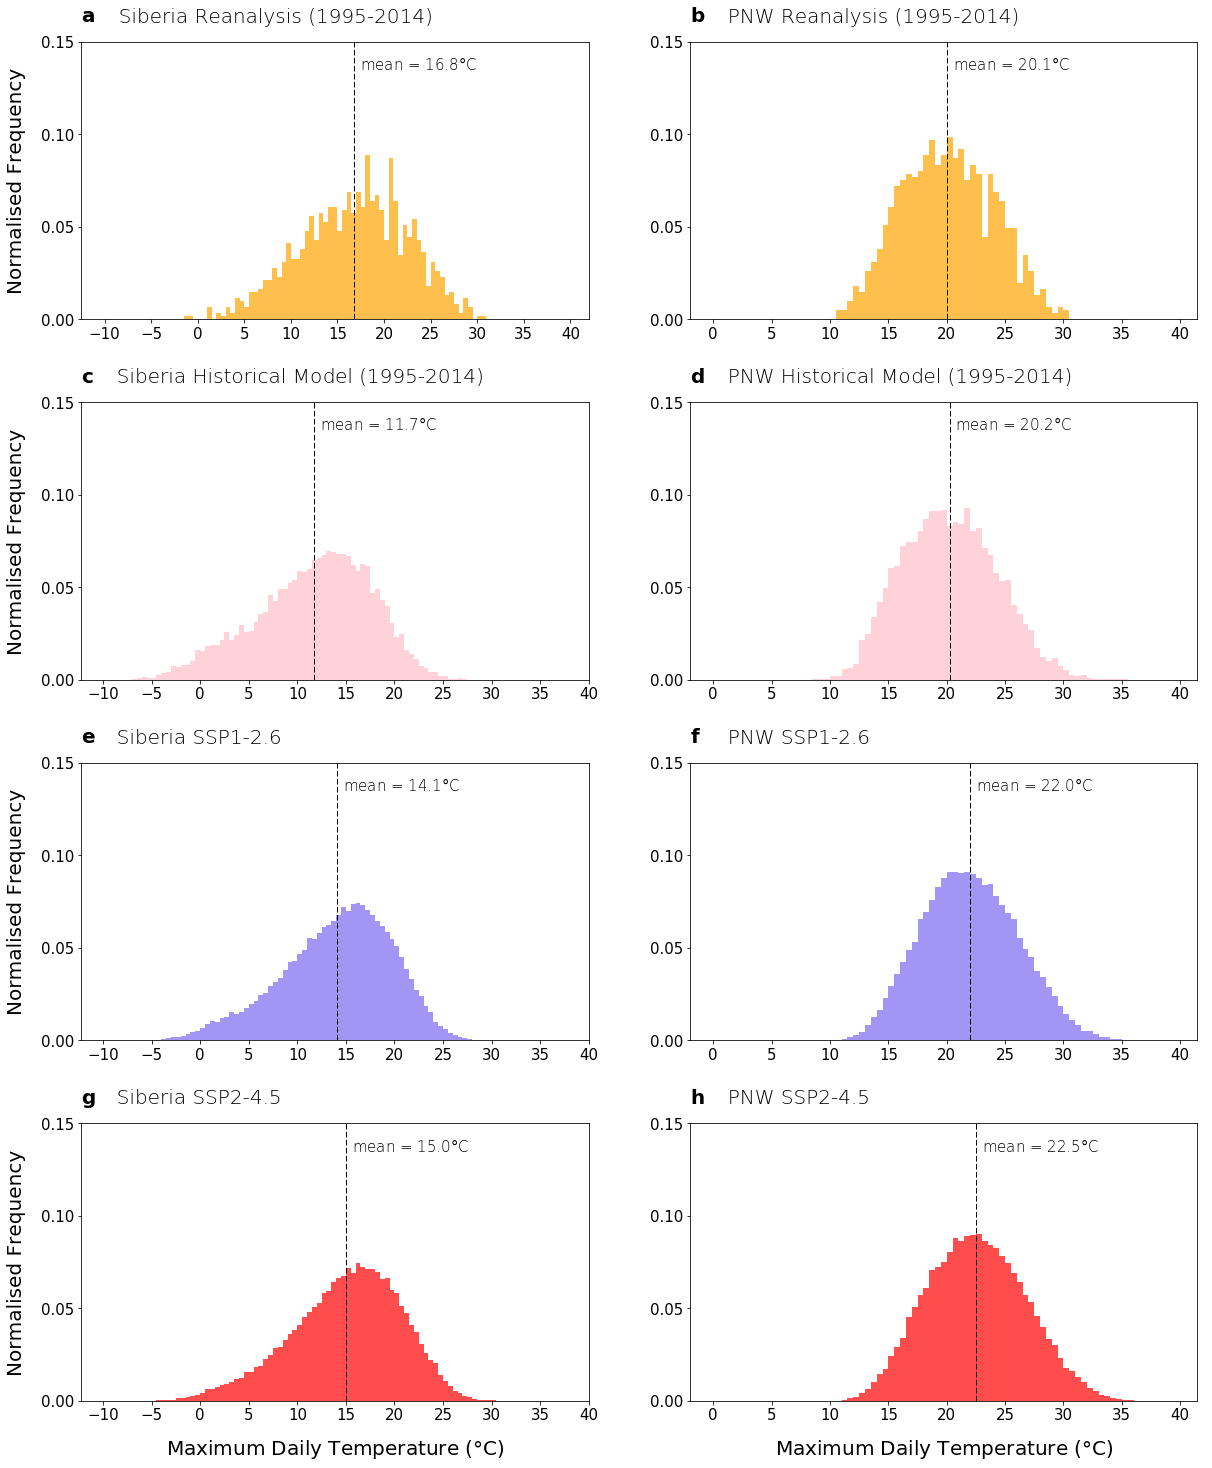

In [103]:
#with 99.5% percentile
#y axis not fixed

#matplotlib
fig1 = plt.figure(figsize=(20,25))
plt.rcParams['axes.titlepad'] = 20

fig1.patch.set_facecolor('w')
plt.axis('off') 
plt.xlabel('Temperature ($\degree$C)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

#position of stdv labels
y_max_value=0.15
y_max_value2=0.15

ax1 = fig1.add_subplot(4,2,1)
n, bins,patches = ax1.hist(df_SIBR['Max_Temp'],normed=True, bins=np.arange(-10,40,0.5), color= 'orange', alpha=0.7)
#n, bins,patches = ax1.hist(df_SIBR['Max_Temp'],normed=True, color= 'orange', alpha=0.7)


#for i in range(len(patches)):
    #patches[i].set_facecolor(plt.cm.hot_r(n[i]/max(n)))
ax1.set_xticks(np.arange(-10, 41, step=5))
ax1.set_ylabel('Normalised Frequency', fontsize=20, labelpad = 15)
ax1.tick_params(labelsize=15)
#ax1.set_yticks(np.arange(0, 11, step=2))
#ax1.xaxis.set_visible(False)
#ax2.xaxis.set_visible(False)
#ax1.set_title('Siberia Reanalysis', size=25, fontweight='light',loc='left')
ax1.set_title('a', size=20, fontweight='bold',loc='left')
ax1.text(-9.875, 1.07*y_max_value2, '  Siberia Reanalysis (1995-2014)',size=20, fontweight='light')

#percentile
#pctl = np.percentile(df_SIBR['Max_Temp'],99.5)
#ax1.axvline(pctl, color='r', linestyle='dashed', linewidth=1)

#mean
mean = df_SIBR['Max_Temp'].mean()
ax1.axvline(mean, color='k', linestyle='dashed', linewidth=1)

# mean label
ax1.text(mean+0.625, 0.9*y_max_value, "mean = " + str(float('%.3g' % mean)) + '$\degree$C', size=15, fontweight='light')


ax2 = fig1.add_subplot(4,2,2)
n, bins,patches = ax2.hist(df_PNWR['Max_Temp'],normed=True, bins=np.arange(0,40,0.5),color= 'orange', alpha=0.7)
#n, bins,patches = ax2.hist(df_PNWR['Max_Temp'],normed=True,color= 'orange', alpha=0.7)

#ax2.set_xticks(np.arange(15, 45, step=5))
#ax2.set_yticks(np.arange(0, 11, step=2))
#ax2.set_title('PNW Reanalysis', size=25, fontweight='light')
ax2.set_title('b', size=20, fontweight='bold',loc='left')
ax2.text(0.16, 1.07*y_max_value, '  PNW Reanalysis (1995-2014)',size=20, fontweight='light')
ax2.tick_params(labelsize=15)

#percentile
#pctl = np.percentile(df_PNWR['Max_Temp'],99.5)
#mean
mean = df_PNWR['Max_Temp'].mean()
ax2.axvline(mean, color='k', linestyle='dashed', linewidth=1)
#ax1.axvline(stdv_1, color='g', linestyle='dashed', linewidth=1)
#ax2.axvline(pctl, color='r', linestyle='dashed', linewidth=1)
#labels
#ax2.text(stdv_2, 1.01*y_max_value, r"2$\sigma$")
# mean label
ax2.text(mean+0.5, 0.9*y_max_value, "mean = " + str(float('%.3g' % mean)) + '$\degree$C', size=15, fontweight='light')



ax3 = fig1.add_subplot(4,2,3)
n, bins,patches = ax3.hist(df_SIBE['Max_Temp'],normed=True, bins=np.arange(-10,35,0.5),color= 'pink',alpha=0.7)
#n, bins,patches = ax3.hist(df_SIBE['Max_Temp'],normed=True, color= 'pink',alpha=0.7)

ax3.set_xticks(np.arange(-10, 41, step=5))
#ax3.set_yticks(np.arange(0, 36, step=5))
#ax3.set_title('Siberia Historical Model', size=25, fontweight='light')
ax3.set_title('c', size=20, fontweight='bold',loc='left')
ax3.text(-9.875, 1.07*y_max_value2, '  Siberia Historical Model (1995-2014)',size=20, fontweight='light')
ax3.set_ylabel('Normalised Frequency', fontsize=20, labelpad = 15)
ax3.tick_params(labelsize=15)
#percentile
#pctl = np.percentile(df_SIBE['Max_Temp'],99.5)
#mean
mean = df_SIBE['Max_Temp'].mean()
ax3.axvline(mean, color='k', linestyle='dashed', linewidth=1)
#ax1.axvline(stdv_1, color='g', linestyle='dashed', linewidth=1)
#ax3.axvline(pctl, color='r', linestyle='dashed', linewidth=1)
#labels
#ax3.text(stdv_2, 1.01*y_max_value2, r"2$\sigma$")
# mean label
ax3.text(mean+0.625, 0.9*y_max_value, "mean = " + str(float('%.3g' % mean)) + '$\degree$C', size=15, fontweight='light')


ax4 = fig1.add_subplot(4,2,4)
n, bins,patches = ax4.hist(df_PNWE['Max_Temp'], bins=np.arange(0,40,0.5),normed=True,color= 'pink', alpha=0.7)
#n, bins,patches = ax4.hist(df_PNWE['Max_Temp'], normed=True,color= 'pink', alpha=0.7)

#ax4.set_xticks(np.arange(15, 45, step=5))
#ax4.set_yticks(np.arange(0, 36, step=5))
#ax4.set_title('PNW Historical Model', size=25, fontweight='light')
ax4.set_title('d', size=20, fontweight='bold',loc='left')
ax4.text(0.16, 1.07*y_max_value, '  PNW Historical Model (1995-2014)',size=20, fontweight='light')
ax4.tick_params(labelsize=15)
#mean and stdv
mean = np.mean(df_PNWE['Max_Temp'])
#percentile
#pctl = np.percentile(df_PNWE['Max_Temp'],99.5)
ax4.axvline(mean, color='k', linestyle='dashed', linewidth=1)
#ax1.axvline(stdv_1, color='g', linestyle='dashed', linewidth=1)
#ax4.axvline(pctl, color='r', linestyle='dashed', linewidth=1)
#labels
#ax4.text(stdv_2, 1.01*y_max_value, r"2$\sigma$")
# mean label
ax4.text(mean+0.5, 0.9*y_max_value, "mean = " + str(float('%.3g' % mean)) + '$\degree$C', size=15, fontweight='light')

#ax1.xaxis.set_visible(False)
#ax2.xaxis.set_visible(False)

#ax5 SIB 1-2.6
ax5 = fig1.add_subplot(4,2,5)
n, bins,patches = ax5.hist(df_SIB126['Max_Temp'],normed=True, bins=np.arange(-10,35,0.5),color= 'mediumslateblue',alpha=0.7)
ax5.set_xticks(np.arange(-10, 41, step=5))
#ax5.set_yticks(np.arange(0, 36, step=5))
#ax5.set_title('Siberia SSP1-2.6', size=25, fontweight='light')
ax5.set_title('e', size=20, fontweight='bold',loc='left')
ax5.text(-9.875, 1.07*y_max_value2, '  Siberia SSP1-2.6',size=20, fontweight='light')
ax5.set_ylabel('Normalised Frequency', fontsize=20, labelpad = 15)
ax5.tick_params(labelsize=15)
#mean and stdv
mean = np.mean(df_SIB126['Max_Temp'])
#percentile
#pctl = np.percentile(df_SIB126['Max_Temp'],99.5)
ax5.axvline(mean, color='k', linestyle='dashed', linewidth=1)
#ax1.axvline(stdv_1, color='g', linestyle='dashed', linewidth=1)
#ax5.axvline(pctl, color='r', linestyle='dashed', linewidth=1)

# mean label
ax5.text(mean+0.625, 0.9*y_max_value, "mean = " + str(float('%.3g' % mean)) + '$\degree$C', size=15, fontweight='light')


#ax6 PNW 1-2.6
ax6 = fig1.add_subplot(4,2,6)
n, bins,patches = ax6.hist(df_PNW126['Max_Temp'], bins=np.arange(0,40,0.5),normed=True,color= 'mediumslateblue', alpha=0.7)
#ax6.set_xticks(np.arange(15, 45, step=5))
#ax6.set_yticks(np.arange(0, 36, step=5))
#ax6.set_title('PNW SSP1-2.6', size=25)
ax6.set_title('f', size=20, fontweight='bold',loc='left')
ax6.text(0.16, 1.07*y_max_value, '  PNW SSP1-2.6',size=20, fontweight='light')
ax6.tick_params(labelsize=15)
#mean and stdv
mean = np.mean(df_PNW126['Max_Temp'])
#percentile
#pctl = np.percentile(df_PNW126['Max_Temp'],99.5)
ax6.axvline(mean, color='k', linestyle='dashed', linewidth=1)
#ax1.axvline(stdv_1, color='g', linestyle='dashed', linewidth=1)
#ax6.axvline(pctl, color='r', linestyle='dashed', linewidth=1)

# mean label
ax6.text(mean+0.5, 0.9*y_max_value, "mean = " + str(float('%.3g' % mean)) + '$\degree$C', size=15, fontweight='light')

#ax7 SIB 2-4.5
ax7 = fig1.add_subplot(4,2,7)
n, bins,patches = ax7.hist(df_SIB245['Max_Temp'],normed=True, bins=np.arange(-10,35,0.5),color= 'red',alpha=0.7)
ax7.set_xticks(np.arange(-10, 41, step=5))
#ax7.set_yticks(np.arange(0, 36, step=5))
#ax7.set_title('Siberia SSP2-4.5', size=25, fontweight='light')
ax7.set_title('g', size=20, fontweight='bold',loc='left')
ax7.text(-9.875, 1.07*y_max_value2, '  Siberia SSP2-4.5',size=20,fontweight='light')
ax7.set_ylabel('Normalised Frequency', fontsize=20, labelpad = 15)
ax7.set_xlabel('Maximum Daily Temperature ($\degree$C)', fontsize=20, labelpad = 15)
ax7.tick_params(labelsize=15)
#mean and stdv
mean = np.mean(df_SIB245['Max_Temp'])
#percentile
#pctl = np.percentile(df_SIB245['Max_Temp'],99.5)
ax7.axvline(mean, color='k', linestyle='dashed', linewidth=1)
#ax1.axvline(stdv_1, color='g', linestyle='dashed', linewidth=1)
#ax7.axvline(pctl, color='r', linestyle='dashed', linewidth=1)

# mean label
ax7.text(mean+0.625, 0.9*y_max_value, "mean = " + str(float('%.3g' % mean)) + '$\degree$C', size=15, fontweight='light')

#ax8 PNW 2-4.5
ax8 = fig1.add_subplot(4,2,8)
n, bins,patches = ax8.hist(df_PNW245['Max_Temp'], bins=np.arange(0,40,0.5),normed=True,color= 'red', alpha=0.7)
#ax8.set_xticks(np.arange(15, 45, step=5))
#ax8.set_yticks(np.arange(0, 36, step=5))
#ax8.set_title('PNW SSP2-4.5', size=25, fontweight='light')
ax8.set_title('h', size=20, fontweight='bold',loc='left')
ax8.text(0.16, 1.07*y_max_value, '  PNW SSP2-4.5',size=20, fontweight='light')
ax8.set_xlabel('Maximum Daily Temperature ($\degree$C)', fontsize=20, labelpad = 15)
ax8.tick_params(labelsize=15)
#mean and stdv
mean = np.mean(df_PNW245['Max_Temp'])
#percentile
#pctl = np.percentile(df_PNW245['Max_Temp'],99.5)
ax8.axvline(mean, color='k', linestyle='dashed', linewidth=1)
#ax1.axvline(stdv_1, color='g', linestyle='dashed', linewidth=1)
#ax8.axvline(pctl, color='r', linestyle='dashed', linewidth=1)

# mean label
ax8.text(mean+0.5, 0.9*y_max_value, "mean = " + str(float('%.3g' % mean)) + '$\degree$C', size=15, fontweight='light')

    
#ax1.xaxis.set_visible(False)
#ax2.xaxis.set_visible(False)

#adjust y axis
ax1.set_yticks(np.arange(0, y_max_value2+0.05, step=0.05))
ax2.set_yticks(np.arange(0, y_max_value+0.05, step=0.05))
ax3.set_yticks(np.arange(0, y_max_value2+0.05, step=0.05))
ax4.set_yticks(np.arange(0, y_max_value+0.05, step=0.05))
ax5.set_yticks(np.arange(0, y_max_value2+0.05, step=0.05))
ax6.set_yticks(np.arange(0, y_max_value+0.05, step=0.05))
ax7.set_yticks(np.arange(0, y_max_value2+0.05, step=0.05))
ax8.set_yticks(np.arange(0, y_max_value+0.05, step=0.05))



#multicoloured
#for i in range(len(patches)):
#    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
#patches[59].set_fc('red')

#plt.title('Pacific Northwest Maximum Temperature Distribution', fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

#plt.tight_layout()

plt.savefig('Histogram_daily.png',format ='png', dpi=150, bbox_inches='tight')

plt.show()

In [5]:
#calculate biases
sibe = np.mean(df_SIBE['Max_Temp'])
sibr = np.mean(df_SIBR['Max_Temp'])
pnwe = np.mean(df_PNWE['Max_Temp'])
pnwr = np.mean(df_PNWR['Max_Temp'])

pnw_bias = pnwe-pnwr
sib_bias = sibe-sibr

print(pnw_bias)
print(sib_bias)


-0.1209921519814614
-7.186340907717813
